# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 20 - 3er bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del jueves 31 de julio (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 60% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/2UKBgNLjBZZ5XCeH9)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co20.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Genero el array x
n = 100
x = np.linspace(-3, 3, n)
x.shape

(100,)

In [32]:
# Genero el vector y
np.random.seed(42)
y = np.tanh(x) + 0.1 * np.random.randn(n)
y.shape

(100,)

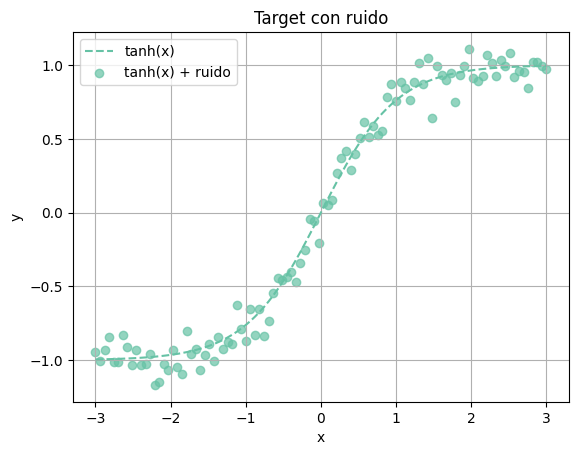

In [33]:
# Visualizo la función con ruido
plt.plot(x, np.tanh(x), label="tanh(x)", linestyle="--")
plt.scatter(x, y, label="tanh(x) + ruido", alpha=0.7)
plt.title("Target con ruido")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [34]:
# Inicializo los pesos (w) y bias (b)
np.random.seed(42)  # Para que sea reproducible
w0 = np.random.randn()
b0 = np.random.randn()
print(f"w0 = {w0:.4f}, b0 = {b0:.4f}")

w0 = 0.4967, b0 = -0.1383


In [35]:
# Defino función de costo (MSE) y su derivada
# Función de pérdida: Error Cuadrático Medio (MSE)
def cost(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# Derivada de la pérdida respecto a la salida estimada
def cost_der(y_hat, y):
    return 2 * (y_hat - y) / y.size

In [36]:
# Activación y su derivada (tanh)
def activation(z):
    return np.tanh(z)

def activation_der(z):
    return 1 - np.tanh(z)**2

In [37]:
def gradiente_descendente(x, y, lr, epochs, w0, b0):
    w = w0
    b = b0

    # Listas para guardar valores por época
    lista_w = []
    lista_b = []
    history = []

    for epoch in range(epochs):
        # Forward pass
        z = w * x + b
        y_hat = activation(z)
        loss_val = cost(y_hat, y)
        history.append(loss_val)

        # Derivadas
        dJ_dyhat = cost_der(y_hat, y)
        dyhat_dz = activation_der(z)
        dz_dw = x
        dz_db = 1

        # Regla de la cadena: ∂J/∂w y ∂J/∂b
        dJ_dw = np.sum(dJ_dyhat * dyhat_dz * dz_dw) / x.size
        dJ_db = np.sum(dJ_dyhat * dyhat_dz * dz_db) / x.size

        # Actualización de parámetros
        w -= lr * dJ_dw
        b -= lr * dJ_db

        # Guardar los valores de w y b
        lista_w.append(w)
        lista_b.append(b)

    return history, lista_w, lista_b


In [38]:
# Parámetros de entrenamiento
epochs = 100
learning_rates = [0.1, 0.01, 0.001]

results_GD = {}
lista_w_GD = {}
lista_b_GD = {}

# Entrenamiento con diferentes tasas de aprendizaje
for lr in learning_rates:
    results_GD[lr], lista_w_GD[lr], lista_b_GD[lr] = gradiente_descendente(x, y, lr, epochs, w0, b0)

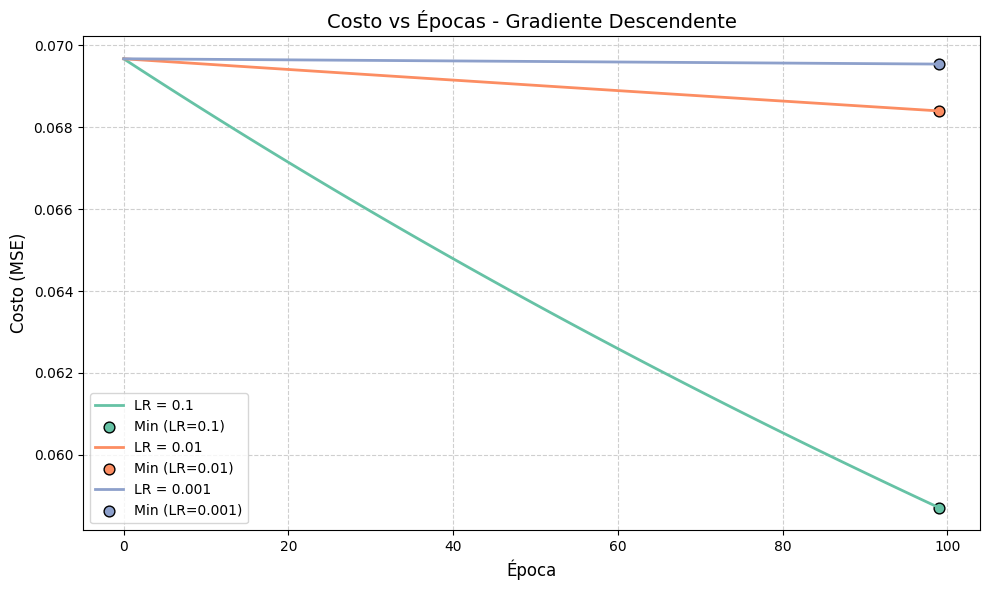

In [39]:
# Configuración estética
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    losses = results_GD[lr]
    plt.plot(losses, label=f"LR = {lr}", linewidth=2)

    # Marcar mínimo
    min_loss = min(losses)
    min_epoch = losses.index(min_loss)
    plt.scatter(min_epoch, min_loss, s=60, marker="o", edgecolor="black", label=f"Min (LR={lr})")

plt.xlabel('Época', fontsize=12)
plt.ylabel('Costo (MSE)', fontsize=12)
plt.title('Costo vs Épocas - Gradiente Descendente', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

#### Conclusión del gráfico "Costo vs Épocas - Gradiente Descendente"

- El **learning rate 0.1** muestra la mejor convergencia: reduce el costo rápidamente y alcanza el menor error.
- El **learning rate 0.01** también disminuye el error, pero de forma más lenta y con menor eficiencia.
- El **learning rate 0.001** presenta una convergencia muy lenta, prácticamente sin reducción significativa del error en 100 épocas.

En este caso, `0.1` es el valor óptimo entre los probados para lograr una buena velocidad de aprendizaje sin inestabilidad.

### 1b) Implementación de Adam (1 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch (batch size a elección de ustedes).

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [40]:
def optimizador_adam(x, y, lr, epochs, w0, b0, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w = w0
    b = b0

    lista_w = []
    lista_b = []
    history = []

    # Inicializar momentos
    mw, vw = 0, 0  # momentos para w
    mb, vb = 0, 0  # momentos para b

    for t in range(1, epochs + 1):
        # Forward pass
        z = w * x + b
        y_hat = activation(z)
        loss_val = cost(y_hat, y)
        history.append(loss_val)

        # Derivadas
        dJ_dyhat = cost_der(y_hat, y)
        dyhat_dz = activation_der(z)
        dz_dw = x
        dz_db = 1

        # Gradientes promedio (batch gradient)
        dJ_dw = np.sum(dJ_dyhat * dyhat_dz * dz_dw) / x.size
        dJ_db = np.sum(dJ_dyhat * dyhat_dz * dz_db) / x.size

        # Momentos para w
        mw = beta1 * mw + (1 - beta1) * dJ_dw
        vw = beta2 * vw + (1 - beta2) * (dJ_dw ** 2)
        mw_hat = mw / (1 - beta1 ** t)
        vw_hat = vw / (1 - beta2 ** t)

        # Momentos para b
        mb = beta1 * mb + (1 - beta1) * dJ_db
        vb = beta2 * vb + (1 - beta2) * (dJ_db ** 2)
        mb_hat = mb / (1 - beta1 ** t)
        vb_hat = vb / (1 - beta2 ** t)

        # Actualización de parámetros
        w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
        b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)

        # Guardar trayectoria
        lista_w.append(w)
        lista_b.append(b)

    return history, lista_w, lista_b

In [41]:
# Inicialización de parámetros
np.random.seed(42)
w0 = np.random.randn()
b0 = np.random.randn()

# Hiperparámetros
epochs = 100
learning_rates = [0.1, 0.01, 0.001]

# Resultados
adam_results = {}
lista_w_adam = {}
lista_b_adam = {}

# Entrenamiento con Adam para cada tasa de aprendizaje
for lr in learning_rates:
    adam_results[lr], lista_w_adam[lr], lista_b_adam[lr] = optimizador_adam(x, y, lr, epochs, w0, b0)

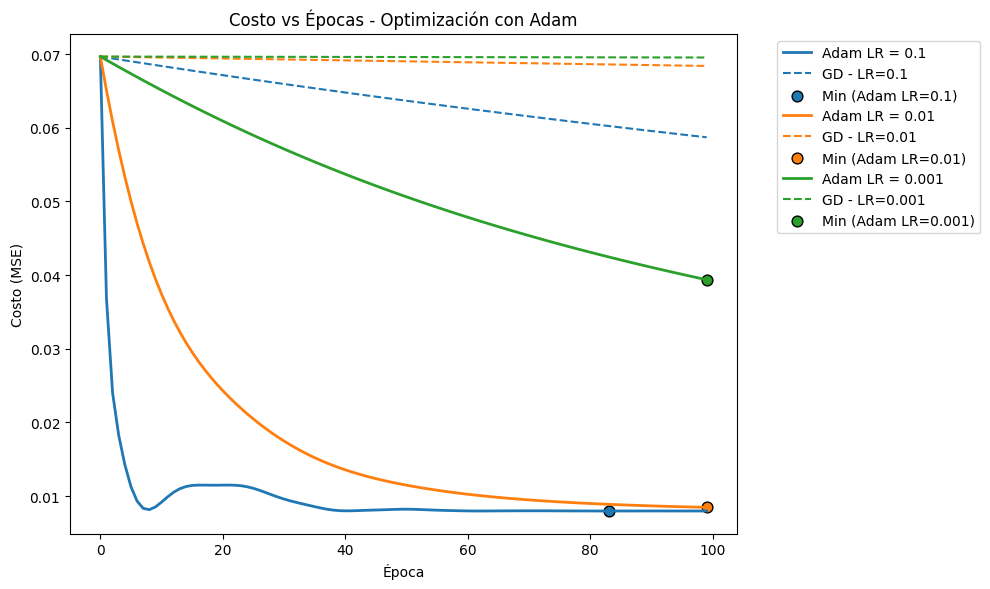

In [42]:
# Gráfico del costo vs épocas

colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    loss = adam_results[lr]
    plt.plot(loss, label=f"Adam LR = {lr}", linewidth=2, color=colors[i])
    
    # Marcar mínimo
    min_loss = min(loss)
    min_epoch = loss.index(min_loss)
    plt.plot(results_GD[lr], linestyle='--', label=f'GD - LR={lr}', color=colors[i])
    plt.scatter(min_epoch, min_loss, s=60, marker="o", edgecolor="black", label=f"Min (Adam LR={lr})", color=colors[i])

plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title('Costo vs Épocas - Optimización con Adam')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.tight_layout()
plt.show()

**Comparación de Adam vs GD:**

Los resultados muestran que Adam alcanza un costo menor que Gradiente Descendente (GD) en las 100 épocas para los tres valores de learning rate evaluados (0.1, 0.01 y 0.001). Adam converge más rápidamente y de forma más eficiente, especialmente con tasas de aprendizaje elevadas, aunque presenta oscilaciones iniciales debido a su comportamiento adaptativo. En contraste, GD muestra una convergencia más lenta y dependiente del valor de LR. Esto evidencia la ventaja de usar Adam como optimizador para este tipo de problemas.

**Resultados esperados y observados:**

| **LR**   | **GD (clásico)**                | **Adam (avanzado)**                          | **¿Es lógico?**               |
|---------|----------------------------------|----------------------------------------------|--------------------------------------|
| 0.1     | Converge lento, lineal           | Baja rápido, tiene oscilaciones iniciales    | Sí, Adam usa momentum              |
| 0.01    | Baja más lento aún               | Muy buen rendimiento, converge más rápido    | Adam supera a GD                   |
| 0.001   | Casi sin convergencia visible    | Mejor que GD, aunque lentamente              | Adam aún mejora a GD               |

### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

In [52]:
# Función de optimización Adam con minibatch
def adam_minibatch(x, y, lr, epochs, w0, b0, batch_size=16, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w = w0
    b = b0
    n = len(x)

    mw, vw = 0, 0
    mb, vb = 0, 0

    history = []
    lista_w = []
    lista_b = []

    t = 0  # contador de actualizaciones (no de épocas)

    for epoch in range(epochs):
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(0, n, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            z = w * x_batch + b
            y_hat = activation(z)
            loss_val = cost(y_hat, y_batch)

            dJ_dyhat = cost_der(y_hat, y_batch)
            dyhat_dz = activation_der(z)
            dz_dw = x_batch
            dz_db = 1

            dJ_dw = np.sum(dJ_dyhat * dyhat_dz * dz_dw) / x_batch.size
            dJ_db = np.sum(dJ_dyhat * dyhat_dz * dz_db) / x_batch.size

            t += 1  # aquí se incrementa en cada batch

            mw = beta1 * mw + (1 - beta1) * dJ_dw
            vw = beta2 * vw + (1 - beta2) * (dJ_dw ** 2)
            mw_hat = mw / (1 - beta1 ** t)
            vw_hat = vw / (1 - beta2 ** t)

            mb = beta1 * mb + (1 - beta1) * dJ_db
            vb = beta2 * vb + (1 - beta2) * (dJ_db ** 2)
            mb_hat = mb / (1 - beta1 ** t)
            vb_hat = vb / (1 - beta2 ** t)

            w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
            b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)

        # Guardar estado al final de cada época
        history.append(loss_val)
        lista_w.append(w)
        lista_b.append(b)

    return history, lista_w, lista_b


In [53]:
# Entrenamiento con Adam full y Adam minibatch
adam_mini_results = {}
lista_w_adam_mini = {}
lista_b_adam_mini = {}

for lr in learning_rates:
    adam_mini_results[lr], lista_w_adam_mini[lr], lista_b_adam_mini[lr] = adam_minibatch(x, y, lr, epochs, w0, b0, batch_size=16)

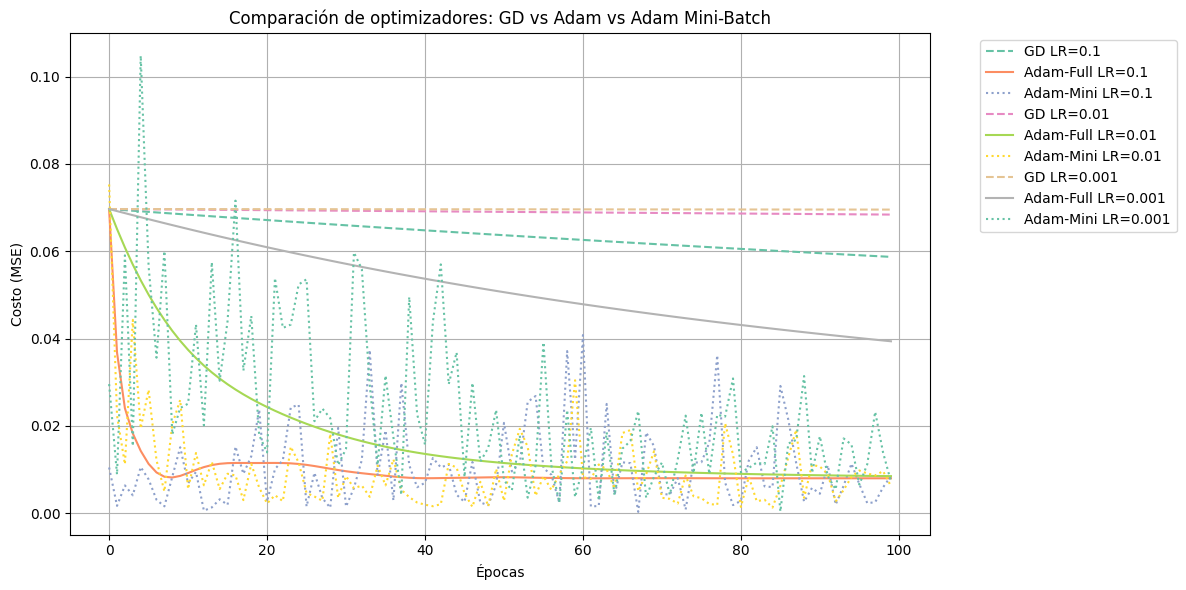

In [54]:
# Gráfico de comparación entre GD, Adam y Adam Mini-Batch
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.plot(results_GD[lr], linestyle='--', label=f"GD LR={lr}")
    plt.plot(adam_results[lr], linestyle='-', label=f"Adam-Full LR={lr}")
    plt.plot(adam_mini_results[lr], linestyle=':', label=f"Adam-Mini LR={lr}")

plt.title("Comparación de optimizadores: GD vs Adam vs Adam Mini-Batch")
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones analíticas – Comparación de optimizadores (GD vs Adam vs Adam Mini-Batch)

#### Learning Rate = 0.1
- **GD**: Disminución del costo de manera lenta y lineal.
- **Adam (Full-Batch)**: Convergencia rápida y suave.
- **Adam (Mini-Batch)**: Muestra oscilaciones marcadas, pero alcanza buenos valores de costo.

*Conclusión*: Adam supera ampliamente a GD. Las oscilaciones de Mini-Batch son esperables debido a la variabilidad de los lotes.

---

#### Learning Rate = 0.01
- **GD**: Mejora respecto al caso anterior, pero sigue siendo más lento que Adam.
- **Adam (Full-Batch)**: Excelente rendimiento, con descenso estable y sin oscilaciones.
- **Adam (Mini-Batch)**: Oscilante pero con tendencia a buen mínimo.

*Conclusión*: Este LR es muy adecuado para Adam. El ruido en Mini-Batch no impide una buena convergencia.

---

#### Learning Rate = 0.001
- **GD**: Prácticamente no hay convergencia visible.
- **Adam (Full-Batch)**: Mejor que GD, aunque con convergencia lenta.
- **Adam (Mini-Batch)**: Presenta ruido elevado y baja estabilidad.

*Conclusión*: Adam sigue siendo superior, aunque el LR bajo limita su eficiencia. El ruido relativo en Mini-Batch aumenta.

---

#### Conclusión general
- **Adam (Full-Batch)** es el más eficiente y estable para este problema.
- **Adam (Mini-Batch)** introduce estocasticidad, lo cual puede ser útil en grandes datasets pero genera oscilaciones marcadas en este caso.
- **GD** es consistente pero menos eficiente, especialmente en tasas de aprendizaje menores.

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

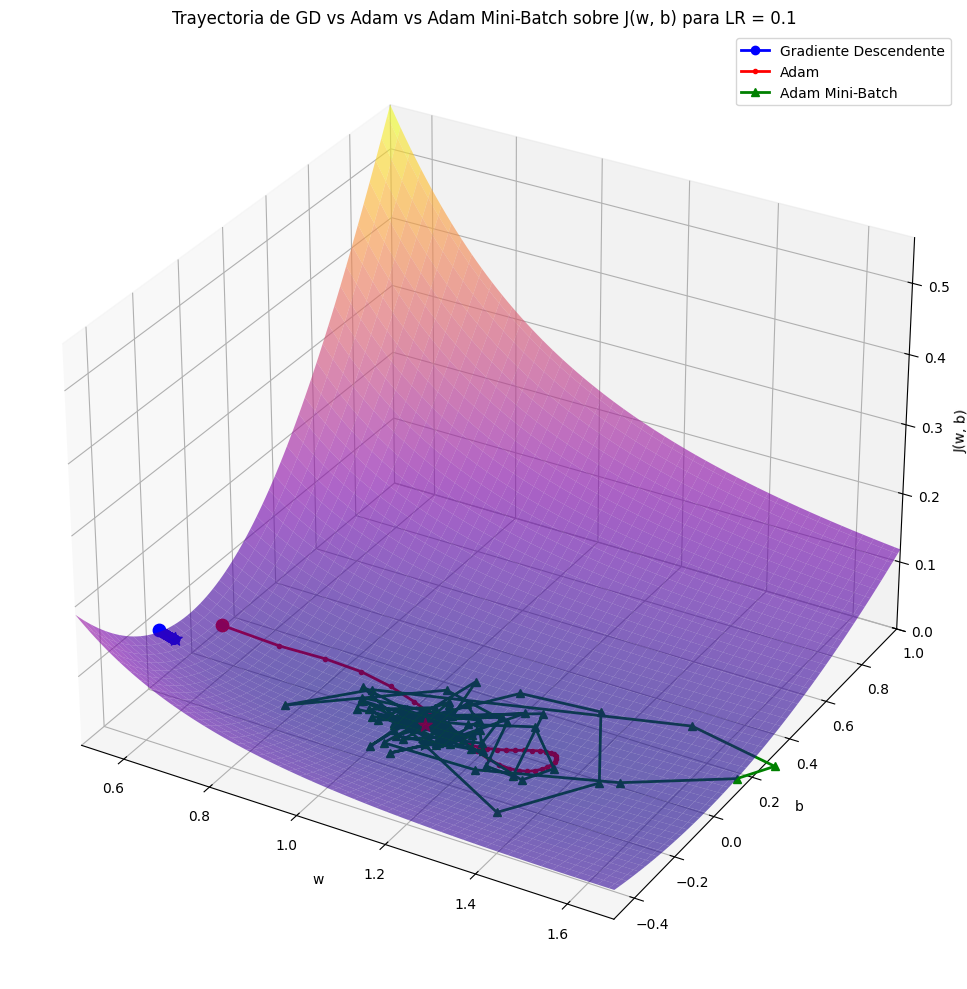

In [70]:
from mpl_toolkits.mplot3d import Axes3D

# Rango de visualización ajustado a trayectorias observadas
w_range = np.linspace(0.5, 1.7, 100)
b_range = np.linspace(-0.5, 1.0, 100)
W, B = np.meshgrid(w_range, b_range)

# Superficie de costo J(w, b)
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        z = W[i, j] * x + B[i, j]
        y_hat = activation(z)
        J[i, j] = np.mean((y_hat - y)**2)

# Learning rate fijo para comparación
lr = 0.1

# Crear gráfico 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Superficie de costo
ax.plot_surface(W, B, J, cmap='plasma', alpha=0.6, edgecolor='none')

# Trayectorias de optimizadores
ax.plot(lista_w_GD[lr], lista_b_GD[lr], results_GD[lr], color='blue', linewidth=2, marker='o', label='Gradiente Descendente')
ax.plot(lista_w_adam[lr], lista_b_adam[lr], adam_results[lr], color='red', linewidth=2, marker='.', label='Adam')
ax.plot(lista_w_adam_mini[lr], lista_b_adam_mini[lr], adam_mini_results[lr], color='green', linewidth=2, marker='^', label='Adam Mini-Batch')

# Puntos de inicio
ax.scatter(lista_w_GD[lr][0], lista_b_GD[lr][0], results_GD[lr][0], color='blue', s=80, marker='o')
ax.scatter(lista_w_adam[lr][0], lista_b_adam[lr][0], adam_results[lr][0], color='red', s=80, marker='o')
ax.scatter(lista_w_adam_mini[lr][0], lista_b_adam_mini[lr][0], adam_mini_results[lr][0], color='green', s=80, marker='o')

# Puntos de convergencia (fin)
ax.scatter(lista_w_GD[lr][-1], lista_b_GD[lr][-1], results_GD[lr][-1], color='blue', s=100, marker='*')
ax.scatter(lista_w_adam[lr][-1], lista_b_adam[lr][-1], adam_results[lr][-1], color='red', s=100, marker='*')
ax.scatter(lista_w_adam_mini[lr][-1], lista_b_adam_mini[lr][-1], adam_mini_results[lr][-1], color='green', s=100, marker='*')

# Etiquetas y ajustes visuales
ax.set_xlim(0.5, 1.7)
ax.set_ylim(-0.5, 1.0)
ax.set_zlim(0, np.max(J))
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
ax.set_title('Trayectoria de GD vs Adam vs Adam Mini-Batch sobre J(w, b) para LR = 0.1')
ax.legend()
plt.tight_layout()
plt.show()


### Comparación de trayectorias para LR = 0.1

En el gráfico anterior, se observa la trayectoria de los algoritmos **Gradiente Descendente (GD)**, **Adam** y **Adam con Mini-Batch** sobre la superficie de la función de costo \( J(w, b) \) para un *learning rate* de 0.1.

- **Adam** converge rápidamente, pero muestra oscilaciones al acercarse al mínimo.
- **GD** sigue un camino más lento pero con una trayectoria suave y directa hacia la convergencia.
- **Adam Mini-Batch** tiene una trayectoria mucho más errática, con saltos desordenados producto de la variabilidad introducida por el muestreo de mini-batches, aunque logra acercarse al mínimo.

Esto refleja cómo la elección del optimizador y la presencia de ruido estocástico pueden afectar la estabilidad del proceso de aprendizaje.

### Ajuste del learning rate

Como se observa, un *learning rate* alto puede acelerar la convergencia pero también introduce inestabilidad, especialmente en métodos como Adam y Adam Mini-Batch. Entonces, decidimos analizar cómo varía el comportamiento de los optimizadores al reducir el *learning rate* a 0.01, buscando una trayectoria más suave y estable que permita comparar mejor la convergencia de cada algoritmo.

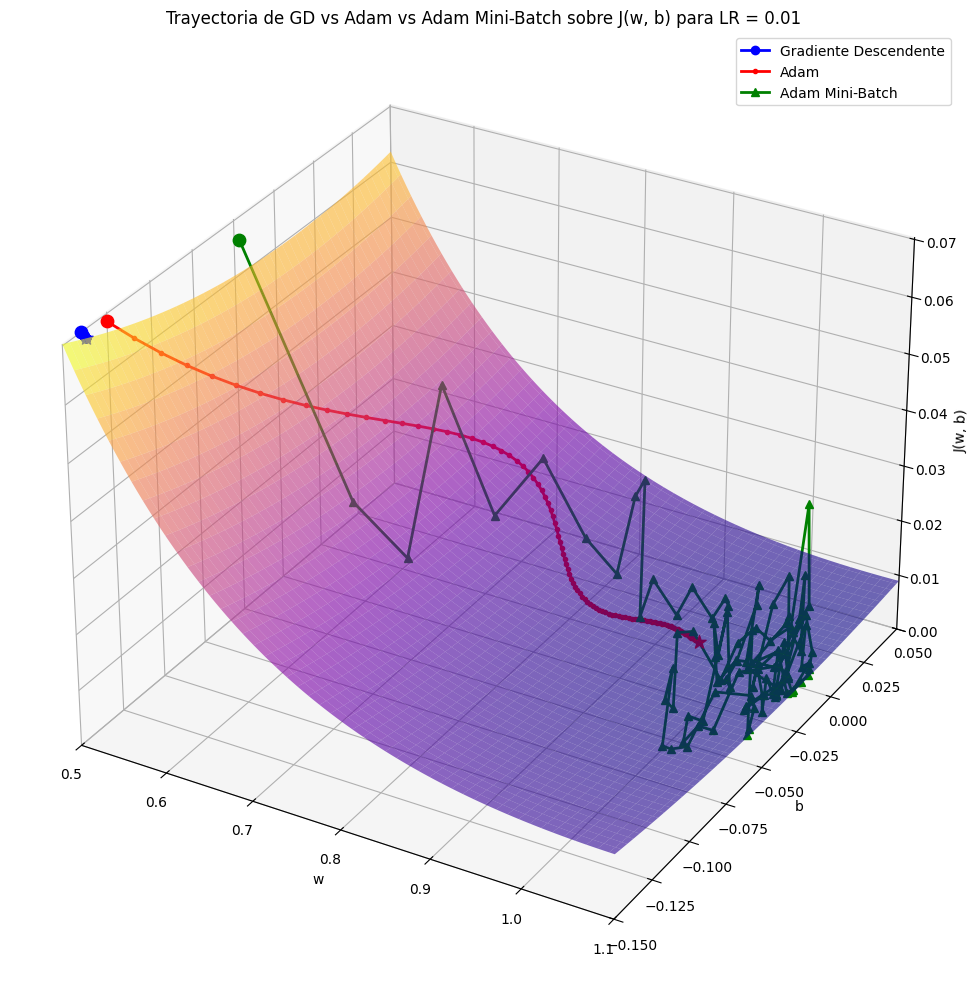

In [72]:
# Rango ajustado a la región de convergencia más acotada
w_range = np.linspace(0.5, 1.1, 100)
b_range = np.linspace(-0.15, 0.05, 100)
W, B = np.meshgrid(w_range, b_range)

# Superficie de costo J(w, b)
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        z = W[i, j] * x + B[i, j]
        y_hat = activation(z)
        J[i, j] = np.mean((y_hat - y)**2)

# Learning rate a comparar
lr = 0.01

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Superficie
ax.plot_surface(W, B, J, cmap='plasma', alpha=0.6, edgecolor='none')

# Trayectorias
ax.plot(lista_w_GD[lr], lista_b_GD[lr], results_GD[lr], color='blue', linewidth=2, marker='o', label='Gradiente Descendente')
ax.plot(lista_w_adam[lr], lista_b_adam[lr], adam_results[lr], color='red', linewidth=2, marker='.', label='Adam')
ax.plot(lista_w_adam_mini[lr], lista_b_adam_mini[lr], adam_mini_results[lr], color='green', linewidth=2, marker='^', label='Adam Mini-Batch')

# Puntos de inicio
ax.scatter(lista_w_GD[lr][0], lista_b_GD[lr][0], results_GD[lr][0], color='blue', s=80, marker='o')
ax.scatter(lista_w_adam[lr][0], lista_b_adam[lr][0], adam_results[lr][0], color='red', s=80, marker='o')
ax.scatter(lista_w_adam_mini[lr][0], lista_b_adam_mini[lr][0], adam_mini_results[lr][0], color='green', s=80, marker='o')

# Puntos finales
ax.scatter(lista_w_GD[lr][-1], lista_b_GD[lr][-1], results_GD[lr][-1], color='blue', s=100, marker='*')
ax.scatter(lista_w_adam[lr][-1], lista_b_adam[lr][-1], adam_results[lr][-1], color='red', s=100, marker='*')
ax.scatter(lista_w_adam_mini[lr][-1], lista_b_adam_mini[lr][-1], adam_mini_results[lr][-1], color='green', s=100, marker='*')

# Ejes
ax.set_xlim(0.5, 1.1)
ax.set_ylim(-0.15, 0.05)
ax.set_zlim(0, np.max(J))
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
ax.set_title('Trayectoria de GD vs Adam vs Adam Mini-Batch sobre J(w, b) para LR = 0.01')
ax.legend()
plt.tight_layout()
plt.show()


### Comparación 3D de Trayectorias con LR = 0.01

Con un *learning rate* más pequeño, se observan trayectorias más estables en general, aunque persisten diferencias relevantes entre los algoritmos:

- **Gradiente Descendente** mantiene una trayectoria suave y constante, avanzando de forma estable hacia el mínimo, aunque con pasos pequeños que alargan la convergencia.
- **Adam** también muestra una trayectoria estable y rápida, sin oscilaciones significativas, lo que sugiere que la reducción del *learning rate* ayudó a amortiguar las variaciones observadas con LR = 0.1.
- **Adam Mini-Batch**, si bien reduce la magnitud de las oscilaciones en comparación con un *learning rate* alto, continúa mostrando una trayectoria errática debido al muestreo aleatorio de los mini-batches. Sin embargo, logra acercarse al mínimo con menor dispersión que en el caso anterior.

En conclusión, al disminuir el *learning rate* a 0.01, se logra una mayor estabilidad y una convergencia más controlada, en especial para los métodos más sensibles a la variabilidad como Adam Mini-Batch. Aun así, Adam sigue destacándose por su eficiencia, mientras que GD ofrece una convergencia más predecible.

### ¿Por qué Gradiente Descendente tiene una trayectoria rápida al inicio?

En el gráfico 3D puede observarse que el Gradiente Descendente (GD) realiza un cambio abrupto en los primeros pasos, seguido de un avance más pausado y estable. Este comportamiento es esperado y se explica por:

- **Gradientes iniciales grandes**: al comienzo del entrenamiento, los errores de predicción son mayores, lo que genera derivadas parciales (gradientes) más grandes y, por lo tanto, pasos más largos en la actualización de los parámetros.
  
- **Reducción progresiva del gradiente**: a medida que GD se acerca al mínimo de la función de costo, los errores disminuyen y los gradientes se vuelven más pequeños. Esto hace que las actualizaciones sean más suaves, provocando una trayectoria más lenta hacia el final del proceso.

- **Tasa de aprendizaje constante**: como el algoritmo usa un `learning rate` constante (por ejemplo, 0.01), la única forma en que los pasos se reduzcan naturalmente es que el gradiente disminuya, lo cual sucede cerca del mínimo.

Este patrón —avance rápido al inicio y estabilización luego— es característico del comportamiento clásico del Gradiente Descendente cuando se aplica sobre funciones suaves como la MSE.

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones, compuestas por un cliente y el producto que adquirió.


### 2a) EDA y preparación del dataset (2.5 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar y transformar las variables que sean necesarias, analizar qué columnas se deben dropear, cuáles vale la pena hacer un tratamiento de valores nulos, si se debe usar label encoding, one-hot encoding o mapping encoding, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a un segmento: "Casual" (gasta menos de 3000), "Gama media" (gasta entre 3000 y 8000), "Gama alta" (gasta entre 8000 y 18000) o a "Premium" (gasta más de 18000), según el producto que adquirió.

Redactar las conclusiones preliminares que pueden notar de las columnas y justificar el porqué de cada encoding aplicado.

**IMPORTANTE: Luego de asignar los segmentos, no se olviden de eliminar la columna "Purchase".**

### 2b) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 77% de accuracy y f1 score para el set de validation.

### 2c) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y test. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Justificar la cantidad de dimensiones usada para los embeddings. **Comparar contra el modelo sin embeddings** y explicar el porqué de los resultados.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 90% de accuracy y f1 score para el set de validation.

### 2d) Encontrar usuarios similares (1 punto)
Para el modelo del punto 2c) implementar una función que reciba un ID de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar. También se debe mostrar el grado o porcentaje de similitud de cada usuario que retorne la función.